# **CS180 Project: Filipino Student Employability Predictor**

##### This is a course requirement submitted by Group # 14 for CS180 Artificial Intelligence Course of the Department of Computer Science, College of Engineering, University of the Philippines, Diliman under the guidance of Sir Carlo Raquel for AY 2022-2023.

##### The dataset entitled 'Students' Employability Dataset - Philippines' can be found <a href="https://www.kaggle.com/datasets/anashamoutni/students-employability-dataset" target="_blank">here</a>. The data collection method was done through a mock interview, where the interviewers graded each student based on their characteristics which also serves as our features.

# **Part 1: Importing the Dataset**


##### We will be using the Student-Employability-Datasets.xlsx dataset, which classifies whether a student is **"Employable"** or **"LessEmployable"**, given a set of criteria. We will be utilizing binary encoding to map the category Employable to 1, and LessEmployable to 0. Additionally, note that the features of the dataset consist of the students' General Appearance, Manner of Speaking, Physical Condition, Mental Alertness, Self-confidence, Ability to Present Ideas, Communication Skills, and Student Performance Rating.

In [14]:
# Import dataset and libraries here
import sys
import pandas as pd
import numpy as np

print(sys.version)

data = pd.read_excel('../data/Student-Employability-Datasets.xlsx')

# Remove the 'Name of Student' column, for it is not needed
data = data.drop("Name of Student", axis=1)

# Binary Encoding
data['CLASS'] = data['CLASS'].map({'LessEmployable': 0, 'Employable': 1})

data

3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,1
1,4,4,4,4,4,4,3,5,1
2,4,3,3,3,3,3,2,5,0
3,3,3,3,2,3,3,3,5,0
4,4,4,3,3,4,4,3,5,1
...,...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5,1
2978,3,4,4,4,4,4,4,5,1
2979,4,5,4,5,4,4,4,5,1
2980,4,4,4,3,4,4,3,5,0


# **Part 2: Data Preprocessing**

##### The classifier requires a training set and a test set. For each set, the column containing the student employability label is be separated from the criteria data, so that the label will not be affect by the normalization. We will be separating the dataset into a features matrix, and a target matrix.



In [15]:
# Features matrix - the 8 criteria of student employability
x = data.drop('CLASS', axis = 1).values

In [16]:
# Target matrix - The student employability label
y = data['CLASS'].values
y

array([1, 1, 0, ..., 1, 0, 1])

# **Part 3: Splitting the Data in Training and Testing Sets**

##### Now that the data preprocessing is done, it is time to proceed with the splitting of the data into training and testing sets. We would be utilizing 70% of the data as training sets, and 30% of the data as testing sets.



In [17]:
from sklearn.model_selection import train_test_split

# Set a seed for data reproducibility
np.random.seed(321)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)
x_train

array([[5, 5, 5, ..., 5, 3, 5],
       [4, 4, 4, ..., 3, 3, 3],
       [5, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 3, 4, ..., 3, 3, 5],
       [4, 3, 4, ..., 3, 3, 5],
       [5, 4, 5, ..., 4, 4, 4]])

# **Part 4: Data Normalization for MLP**

##### Before the actual learning process begins, the data should be normalized first, for the multilayer perceptron to work optimally.



In [18]:
# Normalize train and test sets for MLP
from sklearn.preprocessing import MinMaxScaler

# TANH activation
scaler = MinMaxScaler(feature_range=(-1,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
        -0.33333333,  1.        ],
       [ 0.33333333,  0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333, -1.        ],
       [ 1.        ,  0.33333333,  0.33333333, ...,  0.33333333,
         0.33333333,  0.        ],
       ...,
       [ 0.33333333, -0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333,  1.        ],
       [ 0.33333333, -0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333,  1.        ],
       [ 1.        ,  0.33333333,  1.        , ...,  0.33333333,
         0.33333333,  0.        ]])

# **Part 5: MLP Training and Testing**

##### We  will be utilizing Multilayer Perceptron as our model in predicting the Filipino student's employability. A randomized seed is set for the training to be consistent.


In [19]:
from sklearn.neural_network import MLPClassifier

# Set a seed for data reproducibility
np.random.seed(3122)

mlp = MLPClassifier(max_iter=2000, activation='tanh')
mlp.fit(x_train,y_train)

MLPClassifier(activation='tanh', max_iter=2000)

##### We can improve the model by utilizing hyperparameter tuning with GridSearchCV. We initially used a list of values for the hyperparameters, and took note of the best values for each one, in order to avoid iterating all over again. This is to save time.

In [20]:
# Hypertune the parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [8], 'max_iter': [20000], 'learning_rate_init': [0.005],'alpha':[0.025], 'activation': ['tanh'], } 
grid = GridSearchCV(mlp,param_grid,refit=True)
grid.fit(x_train,y_train)

GridSearchCV(estimator=MLPClassifier(activation='tanh', max_iter=2000),
             param_grid={'activation': ['tanh'], 'alpha': [0.025],
                         'hidden_layer_sizes': [8],
                         'learning_rate_init': [0.005], 'max_iter': [20000]})

# **Part 6: Results and Discussion**

##### After the hyperparametrization, we can now predict our model and gauge its accuracy, as we compare the true values of the test set to the predictions.



In [21]:
# Display accuracy
from sklearn.metrics import accuracy_score
grid_predictions = grid.predict(x_test)
mlp_score = (accuracy_score(y_test, grid_predictions))
print(mlp_score)

0.8715083798882681


##### We can display the confusion matrix for further analysis.

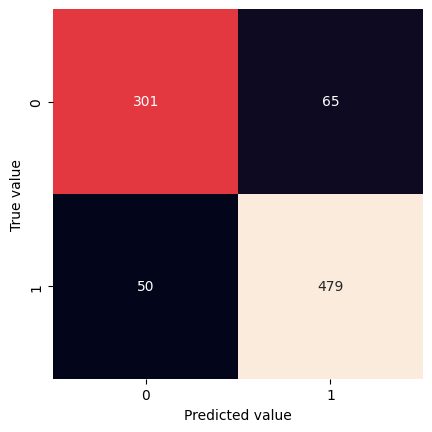

In [22]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, grid_predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

plt.show()


##### To further make sense of this, we can show the classification report as another metric of our model's performance.

In [23]:
# Display classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       366
           1       0.88      0.91      0.89       529

    accuracy                           0.87       895
   macro avg       0.87      0.86      0.87       895
weighted avg       0.87      0.87      0.87       895



##### Based from the metrics of precision, recall, and f1-score, our model was able to provide satisfactory results. An adequate percentage of our predictions were correct and on point.

# **Comparison with Other Models**

##### An existing study entitled 'Predicting Filipino Students' Employability Based on Mock Interview Results' can be found <a href="https://github.com/blurridge/ph-student-employability-ml/blob/main/src/student_employability_ml.ipynb" target="_blank">here</a>. It compares the accuracy of various models, namely, Logistic Regression, K-Nearest Neighbors Classification, and Support Vector Machines, in predicting student employability.

In [24]:
# Load the accuracy scores from the other models.
%store -r logreg_score
%store -r knn_score
%store -r svm_score
%store -r svm_rbf_score


##### Now that we have obtained the accuracy scores from the other models, we can see how well the MLP model performs.

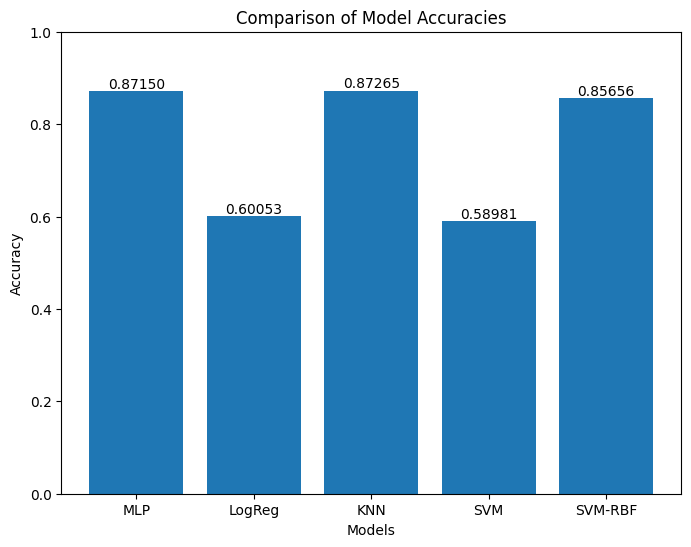

In [25]:
# Compare the different accuracies through a bar graph
import matplotlib.pyplot as plt

models = ['MLP', 'LogReg', 'KNN', 'SVM', 'SVM-RBF']
accuracy_scores = [mlp_score, logreg_score, knn_score, svm_score, svm_rbf_score]  

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1) 

for bar, score in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(score)[:7], ha='center', va='bottom')

plt.show()


# **Part 7: Conclusion**

##### With the various metrics shown above, we can say that our model performs satisfactorily. Upon comparing our model with the accuracy of the different models utilized by a similar research above, it can be said that the MLP model is among the top performers when it comes to predicting student employability. It has a better accuracy score compared to logistic regression and SVM (linear), and is slightly better than SVM-RBF. Our model's accuracy is only beaten by the KNN model by a small margin.


# **Bonus: Saving and Loading the Model/Scaler**

##### We would be using this for the web app.

In [26]:
import pickle

# Save the model
saved_model = 'best_MLP_model.sav'
pickle.dump(grid, open(saved_model, 'wb'))

# Save the scaler
saved_scaler = 'best_scaler.sav'
pickle.dump(scaler, open(saved_scaler, 'wb'))

# Test if model works and predict again
loaded_model = pickle.load(open(saved_model, 'rb'))
print(loaded_model.best_params_)

predict_again = loaded_model.predict(x_test)
print(accuracy_score(y_test, predict_again))

{'activation': 'tanh', 'alpha': 0.025, 'hidden_layer_sizes': 8, 'learning_rate_init': 0.005, 'max_iter': 20000}
0.8715083798882681
